In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

sns.set_theme()

# Import de la source de données
whr22 = pd.read_excel('Données 2022.xlsx')

# Import des effectifs sondés
eff = pd.read_excel('effectifs_annexe_appendix.xlsx', header=0)

# Import du référentiel continents/régions
region = pd.read_excel('continents.xlsx')

In [2]:
# Préparation du df eff pour fusion

## Inversion lignes/colonnes
eff = eff.melt(id_vars = ['Country/territory (ID)', 'Country/territory'], var_name = 'year', value_name = 'eff')

## Renommage des colonnes et pays
DIC = {'Country/territory':'Country name'}
eff = eff.rename(DIC,axis=1)
eff['Country name'] = eff['Country name'].replace({'Czech Republic':'Czechia',
                                                   'Congo Brazzaville' : 'Congo (Brazzaville)',
                                                   'Northern Cyprus' :'North Cyprus', 'The Gambia':'Gambia'})

In [3]:
# Préparation du df whr22 pour fusion

## Modification du type 'year'
whr22 = whr22.astype({'year':'str'})

In [4]:
# Fusion eff et whr22
BASE = whr22.merge(right = eff, on=['Country name','year'], how='left')

In [5]:
# Préparation du df region pour fusion

## Renommage des colonnes et pays
region = region.rename({'name':'Country name'},axis=1)
region['Country name'] = region['Country name'].replace({'Czech Republic':'Czechia', 'Bosnia And Herzegovina': 'Bosnia and Herzegovina',
          'Congo' : 'Congo (Brazzaville)', 'Congo (Democratic Republic Of The)':'Congo (Kinshasa)',
         'Hong Kong' : 'Hong Kong S.A.R. of China',"Côte D'Ivoire":'Ivory Coast', 'Macedonia':'North Macedonia',
         'Palestine':'Palestinian Territories','Taiwan':'Taiwan Province of China'})

## Supression des colonnes à ne pas conserver dans le df region
region = region.drop(['alpha-2','alpha-3','country-code','iso_3166-2','intermediate-region','region-code','sub-region-code',
                      'intermediate-region-code', 'Unnamed: 11'],axis=1)

In [6]:
## Ajout des 3 pays présents dans le df whr22 et manquant dans le df region
region.loc[249]=['Kosovo','Europe','Southern Europe']
region.loc[250]=['North Cyprus','Asia','Western Asia']
region.loc[251]=['Somaliland region','Africa','Sub-Saharan Africa']

In [7]:
# Fusion des df BASE et region
BASE = BASE.merge(right = region, on=['Country name'], how='left')

In [8]:
# Création d'une base BASET pour gérer les NAs
BASET = BASE

In [9]:
# Gestion des données manquantes PIB

## SI PIB connu pour ces pays les années précédentes, moyenne du pays
BASET['Log GDP per capita'] = BASET['Log GDP per capita'].fillna(
    BASET.groupby('Country name')['Log GDP per capita'].transform('mean'))
## SI PIB non connu pour ces pays les années précédentes, moyenne de la région
BASET['Log GDP per capita'] = BASET['Log GDP per capita'].fillna(
    BASET.groupby(['sub-region','year'])['Log GDP per capita'].transform('mean'))


In [10]:
# Gestion des données manquantes soutient social

## SI soutient social connu pour ces pays les années précédentes, moyenne du pays
BASET['Social support'] = BASET['Social support'].fillna(
    BASET.groupby('Country name')['Social support'].transform('mean'))
## SI soutient social non connu pour ces pays les années précédentes, moyenne de la région
BASET['Social support'] = BASET['Social support'].fillna(
    BASET.groupby(['sub-region','year'])['Social support'].transform('mean'))

In [12]:
# Gestion des données manquantes espérance de vie

## SI espérance de vie connu pour ces pays les années précédentes, moyenne du pays
BASET['Healthy life expectancy at birth'] = BASET['Healthy life expectancy at birth'].fillna(
    BASET.groupby('Country name')['Healthy life expectancy at birth'].transform('mean'))
## SI espérance de vie non connu pour ces pays les années précédentes, moyenne de la région
BASET['Healthy life expectancy at birth'] = BASET['Healthy life expectancy at birth'].fillna(
    BASET.groupby(['sub-region','year'])['Healthy life expectancy at birth'].transform('mean'))

In [13]:
# Gestion des données manquantes liberté de choix

## SI liberté de choix connu pour ces pays les années précédentes, moyenne du pays
BASET['Freedom to make life choices'] = BASET['Freedom to make life choices'].fillna(
    BASET.groupby('Country name')['Freedom to make life choices'].transform('mean'))

In [14]:
# Gestion des données manquantes générosité

## SI générosité connu pour ces pays les années précédentes, moyenne du pays
BASET['Generosity'] = BASET['Generosity'].fillna(
    BASET.groupby('Country name')['Generosity'].transform('mean'))
## SI générosité non connu pour ces pays les années précédentes, moyenne de la région
BASET['Generosity'] = BASET['Generosity'].fillna(
    BASET.groupby(['sub-region','year'])['Generosity'].transform('mean'))

In [15]:
# Gestion des données manquantes perception de la corruption

## SI perception de la corruption connu pour ces pays les années précédentes, moyenne du pays
BASET['Perceptions of corruption'] = BASET['Perceptions of corruption'].fillna(
    BASET.groupby('Country name')['Perceptions of corruption'].transform('mean'))
## SI perception de la corruption non connu pour ces pays les années précédentes, moyenne de la région
BASET['Perceptions of corruption'] = BASET['Perceptions of corruption'].fillna(
    BASET.groupby(['sub-region','year'])['Perceptions of corruption'].transform('mean'))

In [16]:
# Gestion des données manquantes affect positif

## SI affect positif connu pour ces pays les années précédentes, moyenne du pays
BASET['Positive affect'] = BASET['Positive affect'].fillna(
    BASET.groupby('Country name')['Positive affect'].transform('mean'))
## SI affect positif non connu pour ces pays les années précédentes, moyenne de la région
BASET['Positive affect'] = BASET['Positive affect'].fillna(
    BASET.groupby(['sub-region','year'])['Positive affect'].transform('mean'))

In [17]:
# Gestion des données manquantes affect négatif

## SI affect négatif connu pour ces pays les années précédentes, moyenne du pays
BASET['Negative affect'] = BASET['Negative affect'].fillna(
    BASET.groupby('Country name')['Negative affect'].transform('mean'))
## SI affect négatif non connu pour ces pays les années précédentes, moyenne de la région
BASET['Negative affect'] = BASET['Negative affect'].fillna(
    BASET.groupby(['sub-region','year'])['Negative affect'].transform('mean'))

In [18]:
# Gestion des données manquantes confiance dans le gouvernement

## SI confiance dans le gouvernement connu pour ces pays les années précédentes, moyenne du pays
BASET['Confidence in national government'] = BASET['Confidence in national government'].fillna(
    BASET.groupby('Country name')['Confidence in national government'].transform('mean'))
## SI confiance dans le gouvernement non connu pour ces pays les années précédentes, moyenne de la région
BASET['Confidence in national government'] = BASET['Confidence in national government'].fillna(
    BASET.groupby(['sub-region','year'])['Confidence in national government'].transform('mean'))

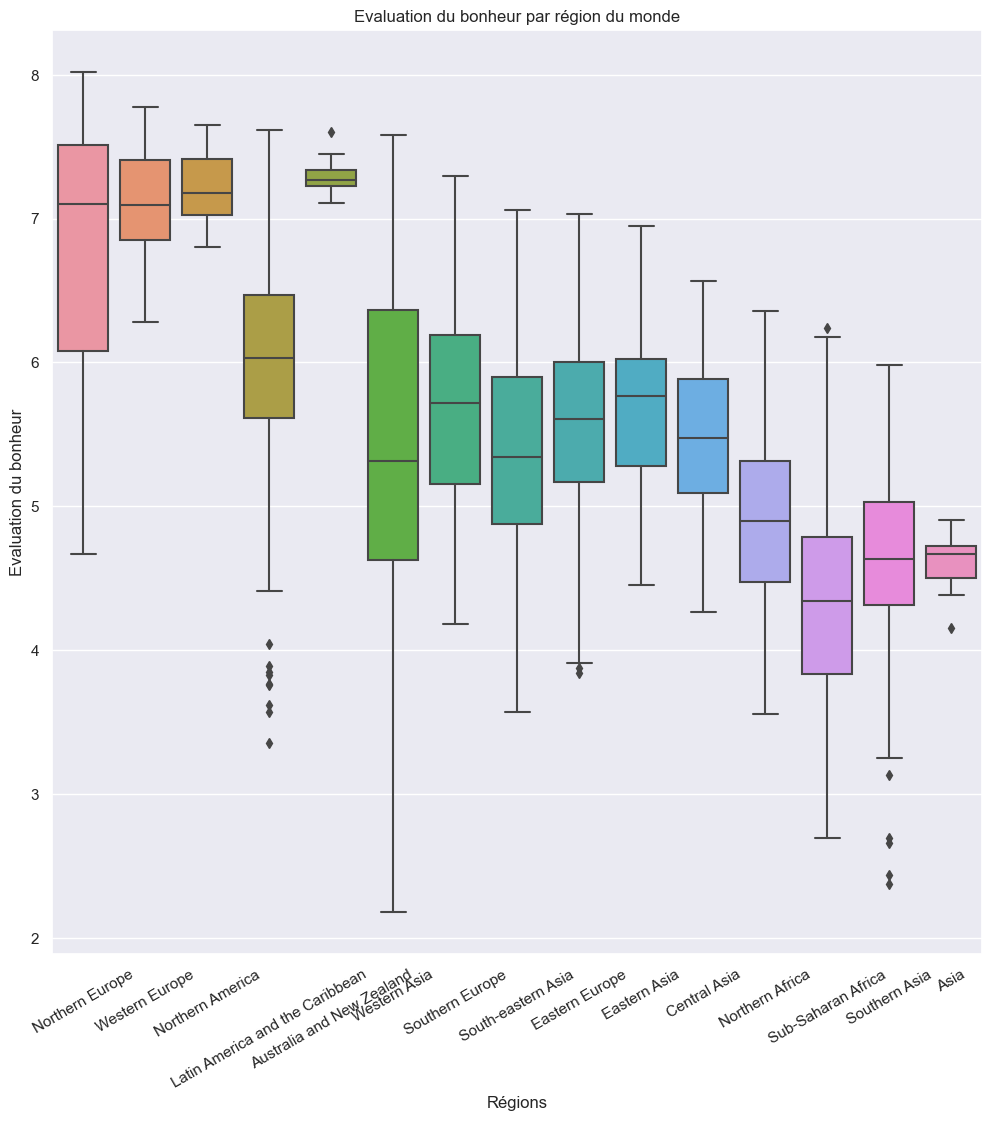

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

sns.boxplot(x='sub-region', y='Life Ladder', data=BASET.sort_values(by='Life Ladder', ascending = False))
plt.title(label='Evaluation du bonheur par région du monde')
plt.xlabel('Régions')
plt.ylabel('Evaluation du bonheur')
plt.xticks(rotation=30);


fig=plt.gcf()

fig.savefig("Bonheur_region",dpi=300)

In [22]:
BASET2021 = BASET[BASET['year'] == '2021']
BASET2021

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Country/territory (ID),eff,region,sub-region
12,Afghanistan,2021,2.436034,7.583020,0.454175,54.549999,0.394306,0.075328,0.946299,0.178886,0.606713,0.255620,70,1000.0,Asia,Southern Asia
26,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924,83,1000.0,Europe,Southern Europe
36,Algeria,2021,5.217018,9.303516,0.840710,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779,0.511986,84,1005.0,Africa,Northern Africa
56,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574,87,1000.0,Americas,Latin America and the Caribbean
71,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146,88,1002.0,Asia,Western Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,Uzbekistan,2021,6.185308,8.941695,0.895504,65.300003,0.927415,0.188775,0.661562,0.698459,0.232672,0.912673,195,1000.0,Asia,Central Asia
2029,Venezuela,2021,5.107553,8.588995,0.812418,64.050003,0.595620,-0.096557,0.823898,0.697587,0.389351,0.175912,32,1000.0,Americas,Latin America and the Caribbean
2045,Vietnam,2021,5.540250,9.028702,0.799494,65.500000,0.896800,0.126362,0.797788,0.650598,0.280437,0.848363,50,1020.0,Asia,South-eastern Asia
2072,Zambia,2021,3.082155,8.087629,0.619071,55.250000,0.832574,0.142837,0.824031,0.655690,0.348551,0.697678,67,1000.0,Africa,Sub-Saharan Africa


NameError: name 'BASET2021' is not defined

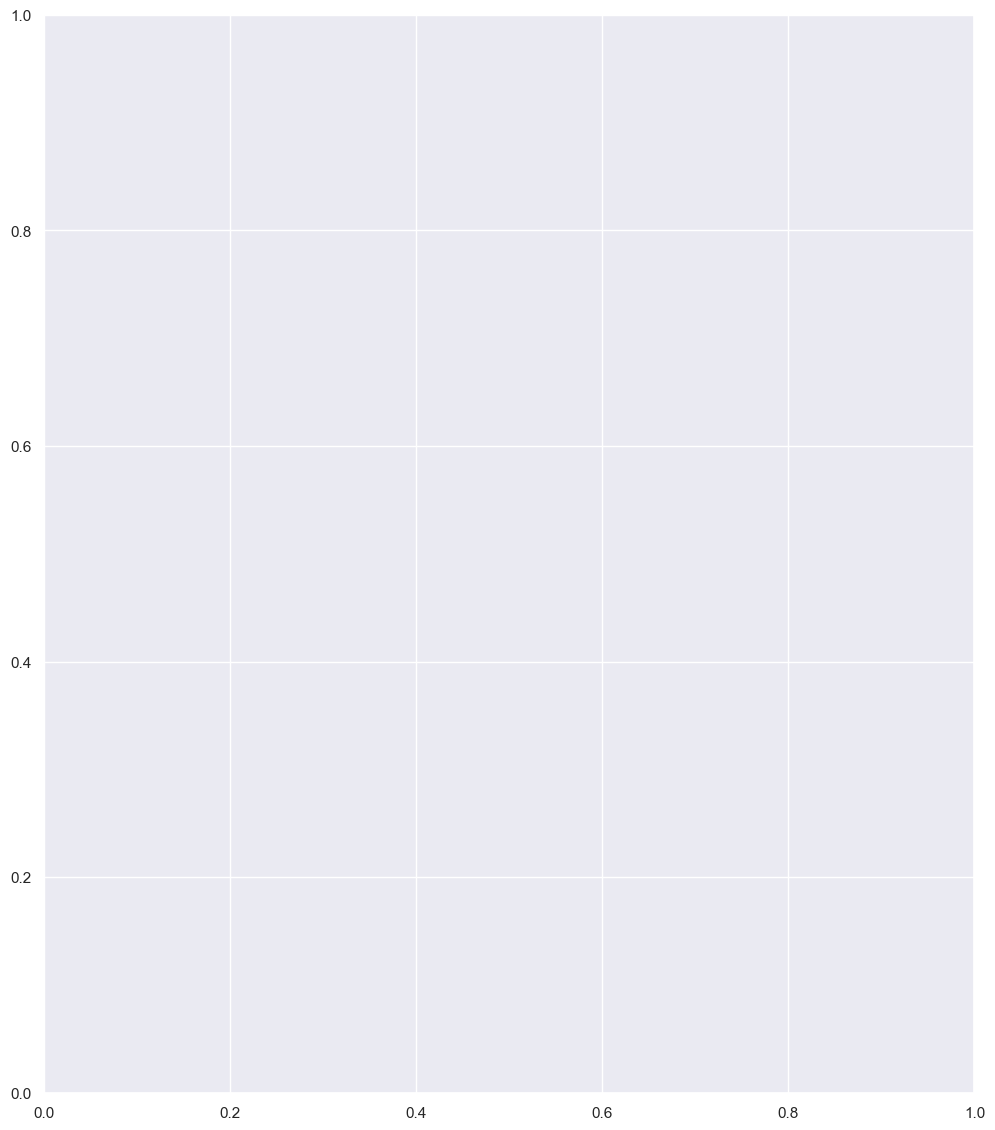

In [20]:
fig, ax = plt.subplots(figsize=(12,14))

sns.boxplot(x='sub-region', y='Life Ladder', data=BASET2021.sort_values(by='Life Ladder', ascending = False))
plt.title(label='Evaluation du bonheur par région du monde - Focus 2021')
plt.ylabel('Evaluation du bonheur')
plt.xlabel('Régions')
plt.xticks(rotation=30);


fig=plt.gcf()


fig.savefig("Bonheur2021_region",dpi=300)

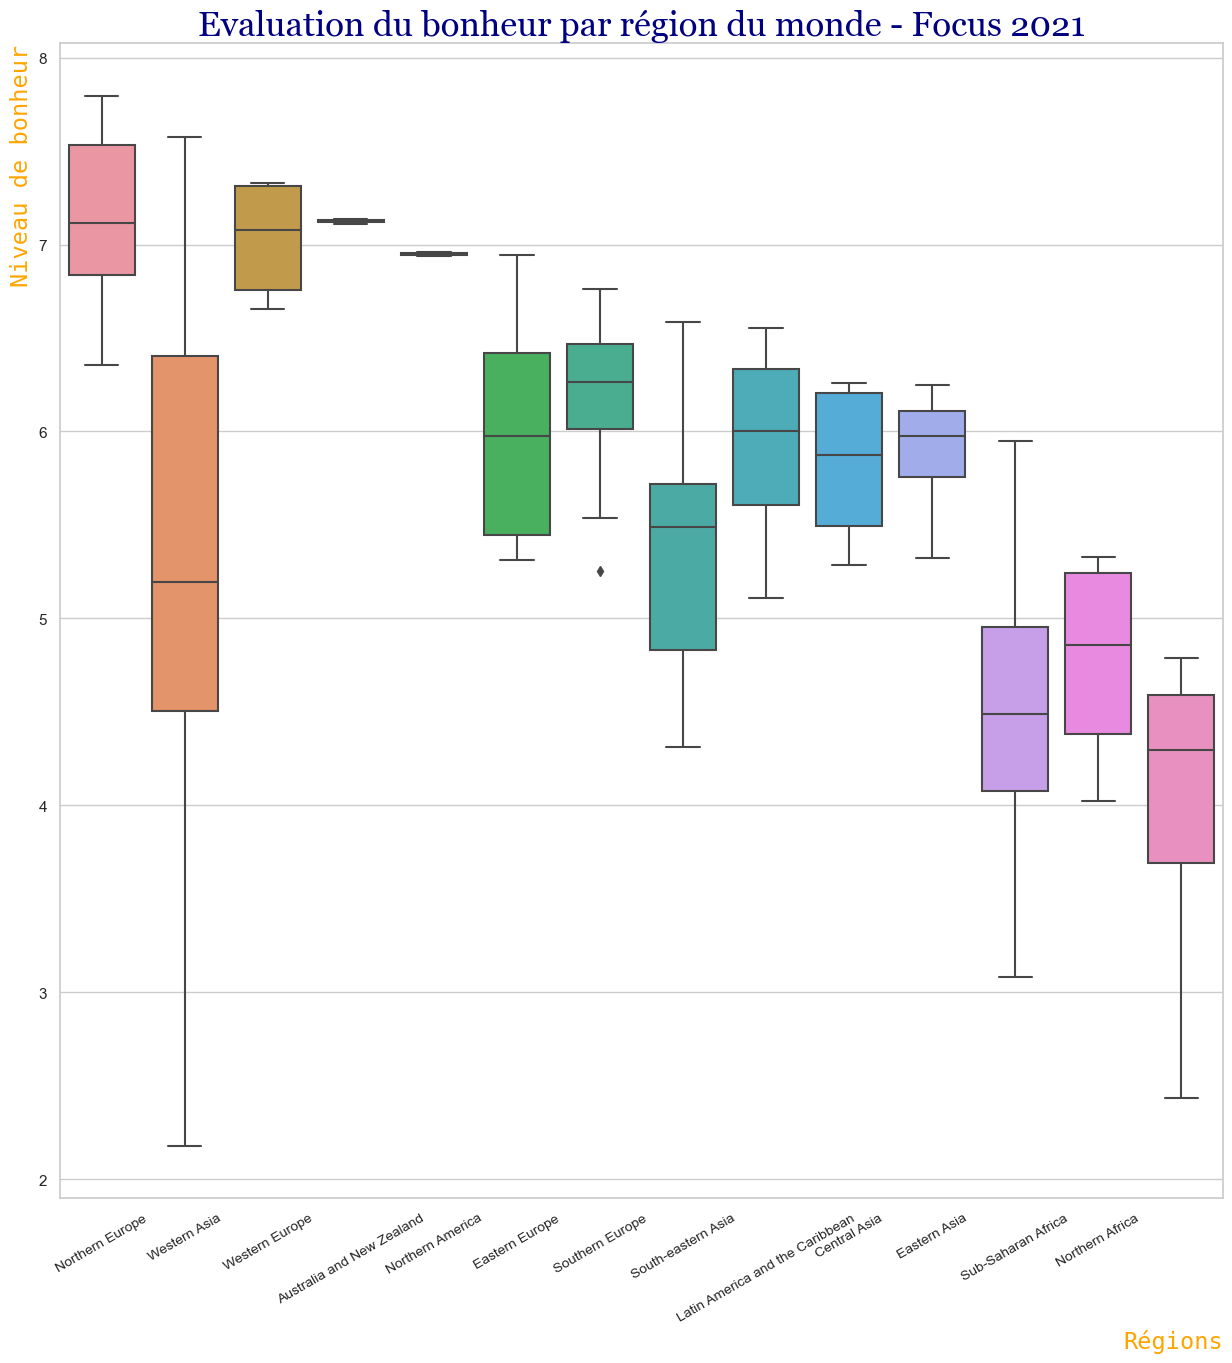

In [58]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(x='sub-region', y='Life Ladder', data=BASET2021.sort_values(by='Life Ladder', ascending = False))
plt.title(label='Evaluation du bonheur par région du monde - Focus 2021',fontsize=25, family = 'Georgia', color ='navy' )
plt.ylabel('Niveau de bonheur',fontsize=17, family = 'monospace', loc = 'top', color ='orange')
plt.xlabel('Régions',fontsize=17, family = 'monospace', loc='right', color = 'orange')
plt.xticks(rotation=30)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,])
plt.setp(ax.get_xticklabels(), fontsize=10.)

sns.set_style('whitegrid')

fig=plt.gcf()
fig.savefig("Bonheur2021_region",dpi=300)

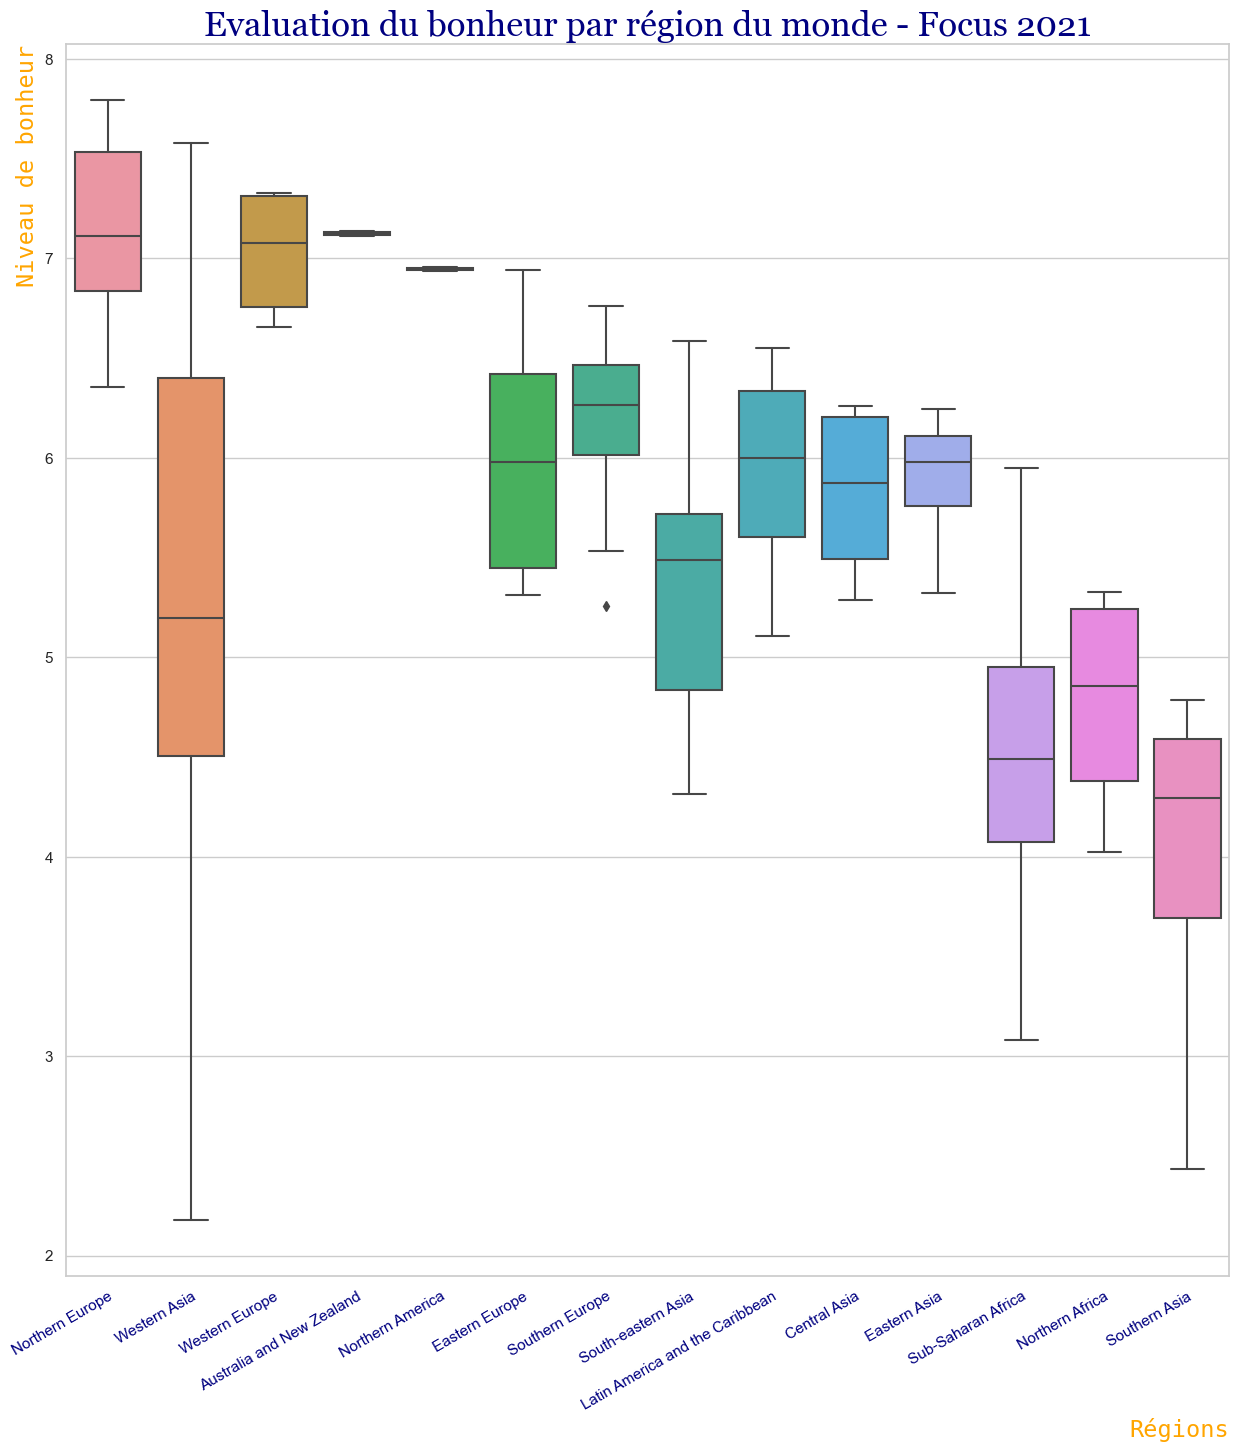

In [64]:
fig, ax = plt.subplots(figsize=(15,16))
sns.boxplot(x='sub-region', y='Life Ladder', data=BASET2021.sort_values(by='Life Ladder', ascending = False))
plt.title(label='Evaluation du bonheur par région du monde - Focus 2021',fontsize=25, family = 'Georgia', color ='navy' )
plt.ylabel('Niveau de bonheur',fontsize=17, family = 'monospace', loc = 'top', color ='orange')
plt.xlabel('Régions',fontsize=17, family = 'monospace', loc='right', color = 'orange')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor', color='navy')

sns.set_style('whitegrid')

fig=plt.gcf()
fig.savefig("Bonheur2021_region",dpi=300)

In [11]:
BASE.head(50)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Country/territory (ID),eff,region,sub-region
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072,70,1010.0,Asia,Southern Asia
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545,70,2000.0,Asia,Southern Asia
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357,70,1000.0,Asia,Southern Asia
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386,70,1000.0,Asia,Southern Asia
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440,70,2000.0,Asia,Southern Asia
5,Afghanistan,2013,3.572100,7.657503,0.483552,52.000000,0.577955,0.066344,0.823204,0.547417,0.273328,0.482847,70,1000.0,Asia,Southern Asia
6,Afghanistan,2014,3.130896,7.650827,0.525568,52.299999,0.508514,0.109215,0.871242,0.491641,0.374861,0.409048,70,1000.0,Asia,Southern Asia
7,Afghanistan,2015,3.982855,7.634466,0.528597,52.599998,0.388928,0.085082,0.880638,0.491410,0.339276,0.260557,70,1000.0,Asia,Southern Asia
8,Afghanistan,2016,4.220169,7.629037,0.559072,52.924999,0.522566,0.047488,0.793246,0.501409,0.348332,0.324990,70,1000.0,Asia,Southern Asia
9,Afghanistan,2017,2.661718,7.629684,0.490880,53.250000,0.427011,-0.116068,0.954393,0.435270,0.371326,0.261179,70,1000.0,Asia,Southern Asia


In [12]:
BASE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   year                               2089 non-null   object 
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2089 non-null   float64
 4   Social support                     2089 non-null   float64
 5   Healthy life expectancy at birth   2031 non-null   float64
 6   Freedom to make life choices       2057 non-null   float64
 7   Generosity                         2009 non-null   float64
 8   Perceptions of corruption          1976 non-null   float64
 9   Positive affect                    2065 non-null   float64
 10  Negative affect                    2073 non-null   float64
 11  Confidence in national government  1873 non-null   float

In [20]:
grouper = BASE.groupby(['Country name', 'year']).mean()

In [21]:
grouper.head(20)

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.302574        0.450662   
             2009     4.401778            7.472446        0.552308   
             2010     4.758381            7.579183        0.539075   
             2011     3.831719            7.552006        0.521104   
             2012     3.782938            7.637953        0.520637   
             2013     3.572100            7.657503        0.483552   
             2014     3.130896            7.650827        0.525568   
             2015     3.982855            7.634466        0.528597   
             2016     4.220169            7.629037        0.559072   
             2017     2.661718            7.629684        0.490880   
             2018     2.694303            7.617663        0.507516   
             2019     2.375092            7.632903        0.419973   
             2021     2.436034            7.583020        0.454175   
Albania      2007     4.634252            9.121524        0.821372   
             2009     5.485470            9.241250        0.833047   
             2010     5.268937            9.282614        0.733152   
             2011     5.867422            9.310439        0.759434   
             2012     5.510124            9.326163        0.784502   
             2013     4.550648            9.337966        0.759477   
             2014     4.813763            9.357625        0.625587   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.500000   
             2009                         50.799999   
             2010                         51.099998   
             2011                         51.400002   
             2012                         51.700001   
             2013                         52.000000   
             2014                         52.299999   
             2015                         52.599998   
             2016                         52.924999   
             2017                         53.250000   
             2018                         53.575001   
             2019                         53.900002   
             2021                         54.549999   
Albania      2007                         66.760002   
             2009                         67.320000   
             2010                         67.599998   
             2011                         67.879997   
             2012                         68.160004   
             2013                         68.440002   
             2014                         68.720001   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.173169   
             2009                      0.678896    0.195469   
             2010                      0.600127    0.125859   
             2011                      0.495901    0.167723   
             2012                      0.530935    0.241247   
             2013                      0.577955    0.066344   
             2014                      0.508514    0.109215   
             2015                      0.388928    0.085082   
             2016                      0.522566    0.047488   
             2017                      0.427011   -0.116068   
             2018                      0.373536   -0.088125   
             2019                      0.393656   -0.103467   
             2021                      0.394306         NaN   
Albania      2007                      0.528605   -0.008521   
             2009                      0.525223   -0.157363   
             2010                      0.568958   -0.171783   
             2011                      0.487496   -0.204296   
             2012                      0.601512   -0.168579   
       